In [2]:
import pandas as pd

In [3]:
data_original = pd.read_csv("Data_for_ML.csv")
data_original.head(5)

,hadm_id,sex,age_at_adm,category,subject_id,marital_status_descr,ethnicity_descr,overall_payor_group_descr,religion_descr,admission_type_descr,seasons,icustay_id,Pulse_BPM,Resp_Rate_BPM,Temp_F,Sys_BP_mmHg,Dia_BP_mmHg
0,28766.0,F,90.0,Neoplasms,56,MARRIED,WHITE,MEDICARE-PRIVATE,NOT SPECIFIED,EMERGENCY,winter,62.0,74.0,24.0,95.500000,141.0,56.0
1,2075.0,M,76.0,Infectious diseases,3,MARRIED,WHITE,MEDICARE,CATHOLIC,EMERGENCY,autumn,4.0,151.0,5.0,98.199997,78.0,49.0
2,20666.0,M,87.0,Ischemic heart disease,21,MARRIED,WHITE,MEDICARE,JEWISH,EMERGENCY,autumn,23.0,77.0,16.0,98.199997,107.0,49.0
3,12532.0,M,72.0,Neoplasms,12,MARRIED,WHITE,MEDICARE,JEWISH,ELECTIVE,autumn,13.0,88.0,12.0,96.300003,123.0,68.0
4,15067.0,M,72.0,Other forms of heart disease,26,SINGLE,UNKNOWN/NOT SPECIFIED,MEDICARE,CATHOLIC,EMERGENCY,spring,29.0,60.0,18.0,99.699997,102.0,45.0


In [4]:
# Dropping unwanted columns

In [5]:
data_original.columns

Index(['hadm_id', 'sex', 'age_at_adm', 'category', 'subject_id',
       'marital_status_descr', 'ethnicity_descr', 'overall_payor_group_descr',
       'religion_descr', 'admission_type_descr', 'seasons', 'icustay_id',
       'Pulse_BPM', 'Resp_Rate_BPM', 'Temp_F', 'Sys_BP_mmHg', 'Dia_BP_mmHg'],
      dtype='object')

In [6]:
data_dropped_original = data_original.drop(['hadm_id',
                    'subject_id',
                    'marital_status_descr',
                    'ethnicity_descr',
                    'overall_payor_group_descr',
                    'religion_descr',
                    'admission_type_descr',
                    'seasons',
                    'icustay_id'], axis =1)

In [7]:
data_dropped_original

,sex,age_at_adm,category,Pulse_BPM,Resp_Rate_BPM,Temp_F,Sys_BP_mmHg,Dia_BP_mmHg
0,F,90.0,Neoplasms,74.0,24.0,95.500000,141.0,56.0
1,M,76.0,Infectious diseases,151.0,5.0,98.199997,78.0,49.0
2,M,87.0,Ischemic heart disease,77.0,16.0,98.199997,107.0,49.0
3,M,72.0,Neoplasms,88.0,12.0,96.300003,123.0,68.0
4,M,72.0,Other forms of heart disease,60.0,18.0,99.699997,102.0,45.0
...,...,...,...,...,...,...,...,...
3466,M,57.0,Infectious diseases,109.0,21.0,97.400002,98.0,47.0
3467,F,33.0,Cerebrovascular disease,49.0,12.0,95.400002,82.0,55.0
3468,M,79.0,Pulmonary disease,93.0,24.0,99.400002,100.0,52.0
3469,M,68.0,Pulmonary disease,70.0,25.0,96.699997,146.0,71.0


In [7]:
# Seaparting Top 10 categories

In [8]:
data_dropped_original["category"].nunique()

27

In [8]:
data_dropped_original.category.value_counts()

Pulmonary disease                                                          471
Neoplasms                                                                  382
Ischemic heart disease                                                     376
Digestive disease                                                          368
Infectious diseases                                                        361
Other forms of heart disease                                               346
Trauma                                                                     327
Cerebrovascular disease                                                    315
Arteries & veins                                                           123
Renal insufficiency                                                         80
Metabolic disorder                                                          60
Symptoms, signs, & ill-defined conditions                                   42
Chronic rheumatic heart disease                     

In [9]:
top_10 = data_dropped_original["category"].value_counts().index[:10]
top_10

Index(['Pulmonary disease', 'Neoplasms', 'Ischemic heart disease',
       'Digestive disease', 'Infectious diseases',
       'Other forms of heart disease', 'Trauma', 'Cerebrovascular disease',
       'Arteries & veins', 'Renal insufficiency'],
      dtype='object')

In [10]:
data_org_10 = data_dropped_original[data_dropped_original["category"].isin(top_10)]

In [11]:
data_org_10

,sex,age_at_adm,category,Pulse_BPM,Resp_Rate_BPM,Temp_F,Sys_BP_mmHg,Dia_BP_mmHg
0,F,90.0,Neoplasms,74.0,24.0,95.500000,141.0,56.0
1,M,76.0,Infectious diseases,151.0,5.0,98.199997,78.0,49.0
2,M,87.0,Ischemic heart disease,77.0,16.0,98.199997,107.0,49.0
3,M,72.0,Neoplasms,88.0,12.0,96.300003,123.0,68.0
4,M,72.0,Other forms of heart disease,60.0,18.0,99.699997,102.0,45.0
...,...,...,...,...,...,...,...,...
3466,M,57.0,Infectious diseases,109.0,21.0,97.400002,98.0,47.0
3467,F,33.0,Cerebrovascular disease,49.0,12.0,95.400002,82.0,55.0
3468,M,79.0,Pulmonary disease,93.0,24.0,99.400002,100.0,52.0
3469,M,68.0,Pulmonary disease,70.0,25.0,96.699997,146.0,71.0


In [12]:
data_org_10["category"].value_counts()

Pulmonary disease               471
Neoplasms                       382
Ischemic heart disease          376
Digestive disease               368
Infectious diseases             361
Other forms of heart disease    346
Trauma                          327
Cerebrovascular disease         315
Arteries & veins                123
Renal insufficiency              80
Name: category, dtype: int64

In [13]:
# Encoding Categorical Variables

In [14]:
# Replacing Male and Female
data_org_10["sex"].replace({"M":"1" , "F":"0"}, inplace = True)


# Creating two lists to be zipped and mapped
cat = ['Neoplasms',
     'Infectious diseases',
     'Ischemic heart disease',
     'Other forms of heart disease',
     'Cerebrovascular disease',
     'Pulmonary disease',
     'Trauma',
     'Digestive disease',
     'Arteries & veins',
     'Renal insufficiency']

num = ["0",
      "1",
      "2",
      "3",
      "4",
      "5",
      "6",
      "7",
      "8",
      "9"]

# Replacing Categories
data_org_10["category"] = data_org_10["category"].map(dict(zip(cat,num)))

C:\Users\Maaz Tahir\AppData\Local\Temp\ipykernel_8932\151146311.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_org_10["sex"].replace({"M":"1" , "F":"0"}, inplace = True)
C:\Users\Maaz Tahir\AppData\Local\Temp\ipykernel_8932\151146311.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_org_10["category"] = data_org_10["category"].map(dict(zip(cat,num)))


In [15]:
data_org_10.head(10)

,sex,age_at_adm,category,Pulse_BPM,Resp_Rate_BPM,Temp_F,Sys_BP_mmHg,Dia_BP_mmHg
0,0,90.0,0,74.0,24.0,95.500000,141.000000,56.000000
1,1,76.0,1,151.0,5.0,98.199997,78.000000,49.000000
2,1,87.0,2,77.0,16.0,98.199997,107.000000,49.000000
3,1,72.0,0,88.0,12.0,96.300003,123.000000,68.000000
4,1,72.0,3,60.0,18.0,99.699997,102.000000,45.000000
5,1,68.0,2,89.0,21.0,100.500000,125.044968,59.619643
8,1,73.0,4,87.0,28.0,96.500000,138.000000,70.000000
9,1,54.0,0,96.0,22.0,100.900002,125.044968,59.619643
10,0,35.0,5,70.0,18.0,97.699997,90.000000,63.000000
11,0,65.0,4,49.0,13.0,98.599998,109.000000,42.000000


In [16]:
# Checking for Imbalance Data

In [17]:
data_org_10["category"].value_counts()

5    471
0    382
2    376
7    368
1    361
3    346
6    327
4    315
8    123
9     80
Name: category, dtype: int64

In [18]:
# We have Imbalance classes, so we we upsample using SMOTE

In [19]:
X = data_org_10.drop("category", axis = 1)
y = data_org_10["category"]

In [20]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=2022)

X_resampled, y_resampled = ros.fit_resample(X, y)

In [21]:
up_data_org = pd.concat([X_resampled, pd.Series(y_resampled)], axis =1)
up_data_org.head(5)

,sex,age_at_adm,Pulse_BPM,Resp_Rate_BPM,Temp_F,Sys_BP_mmHg,Dia_BP_mmHg,category
0,0,90.0,74.0,24.0,95.500000,141.0,56.0,0
1,1,76.0,151.0,5.0,98.199997,78.0,49.0,1
2,1,87.0,77.0,16.0,98.199997,107.0,49.0,2
3,1,72.0,88.0,12.0,96.300003,123.0,68.0,0
4,1,72.0,60.0,18.0,99.699997,102.0,45.0,3


In [22]:
# up_data_org.to_csv("upscaled_original_data.csv", index = False)

In [23]:
up_data_org["category"].value_counts()

0    471
1    471
2    471
3    471
4    471
5    471
6    471
7    471
8    471
9    471
Name: category, dtype: int64

In [24]:
# Now we will apply various Classification Algorithms

In [25]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [26]:
# Splitting Data into Train_set and Test_set

In [27]:
train_set, test_set = train_test_split(up_data_org, test_size = 0.1, random_state = 2022, stratify = up_data_org["category"])

In [28]:
models = [RandomForestClassifier(),
         LogisticRegression(),
         KNeighborsClassifier(),
         SVC(),
         DecisionTreeClassifier(),
         GaussianNB(),
         GradientBoostingClassifier()]

In [29]:
# Separating x variables from Train_set
x = train_set.drop('category', axis = 1)

# Seaparting y variable from Train_set
y = train_set['category']

# Creating Training and Validation data sets
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.1, random_state = 2022)

# Scaling x variables of Train and Validation sets
x_train_scaled = sc.fit_transform(x_train)
x_val_scaled = sc.transform(x_val)

# Separating x variables from Test_set 
x1 = test_set.drop('category', axis = 1)

# Scaling x Varaibles from Test_set
x1_scaled = sc.transform(x1)

# Seaparting y variable from Train_set
y1 = test_set['category']


fr = []

for i in models:
    
    # Training
    model = i
    model.fit(x_train_scaled, y_train)
    pr_train = model.predict(x_train_scaled)
    act_train = y_train
    
    training_score = accuracy_score(act_train, pr_train)
    
    
    # Validation
    pr_val = model.predict(x_val_scaled)
    act_val = y_val
    
    val_score = accuracy_score(act_val, pr_val)
    
    
    # Testing
    pr_test = model.predict(x1_scaled)
    act_test = y1
    
    test_score = accuracy_score(act_test, pr_test)
    
    dict1 = {
        "model": type(model).__name__,
        "Training_score": training_score,
        "Validation_score": val_score,
        "Testing_score": test_score
    }
    
    fr.append(dict1)

In [30]:
initial_results = pd.DataFrame(fr)
initial_results.set_index("model", inplace = True)

In [32]:
initial_results

,Training_score,Validation_score,Testing_score
model,,,
RandomForestClassifier,1.000000,0.570755,0.636943
LogisticRegression,0.198689,0.183962,0.174098
KNeighborsClassifier,0.564613,0.372642,0.354565
SVC,0.372739,0.278302,0.278132
DecisionTreeClassifier,1.000000,0.528302,0.628450
GaussianNB,0.210223,0.169811,0.199575
GradientBoostingClassifier,0.605767,0.408019,0.401274


In [33]:
initial_results.to_csv("ML_results_on_Orginal_data.csv")

In [23]:
initial_results = pd.read_csv("ML_results_on_Orginal_data.csv", index_col = "model")

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
'PuBuGnr' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

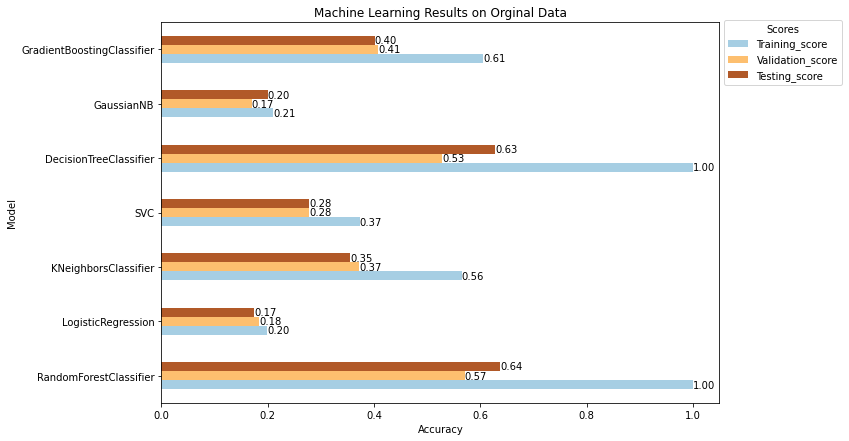

In [48]:
# Plotting ML Results
ax = initial_results.plot(kind='barh', rot=0, xlabel='Model', 
                          title='Machine Learning Results on Orginal Data', figsize=(10, 7),
                         colormap = 'Paired')

# add some labels
for c in ax.containers:
    # set the bar label
    ax.bar_label(c, fmt='%.2f', label_type='edge')
    
# add a little space at the top of the plot for the annotation
ax.margins(y=0.1)

plt.xlabel("Accuracy")

# move the legend out of the plot
ax.legend(title='Scores', bbox_to_anchor=(1, 1.02), loc='upper left')

plt.savefig("ML_results_on_Orginal_data.jpeg", bbox_inches = "tight")

In [41]:
# From here we will make a Neural Net

In [17]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [38]:
data = pd.read_csv("upscaled_original_data.csv")

In [39]:
data.head(5)

,sex,age_at_adm,Pulse_BPM,Resp_Rate_BPM,Temp_F,Sys_BP_mmHg,Dia_BP_mmHg,category
0,0,90.0,74.0,24.0,95.500000,141.0,56.0,0
1,1,76.0,151.0,5.0,98.199997,78.0,49.0,1
2,1,87.0,77.0,16.0,98.199997,107.0,49.0,2
3,1,72.0,88.0,12.0,96.300003,123.0,68.0,0
4,1,72.0,60.0,18.0,99.699997,102.0,45.0,3


In [40]:
train_set, test_set = train_test_split(data, test_size =0.1, random_state = 2022)

In [41]:
train_set.shape, test_set.shape

((4239, 8), (471, 8))

In [42]:
x = train_set.drop("category", axis =1).to_numpy()
y = train_set['category'].to_numpy()

In [43]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.1, random_state = 2022)

In [44]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()

# Scaling inputs of train and validation set
x_train_scaled = sc.fit_transform(x_train)
x_val_scaled = sc.transform(x_val)


# Encoding train and validation variable
y_train = lb.fit_transform(y_train)
y_val = lb.transform(y_val)


# Scaling inputs of test set 
x1 = test_set.drop("category", axis = 1).to_numpy()
x1_scaled = sc.transform(x1)

y1 = test_set["category"].to_numpy()
y1 = lb.transform(y1)

print(y_train[0])

[0 0 0 0 1 0 0 0 0 0]


In [45]:
def define_model(input_shape, num_classes):
    # Build the architecture
    
    model = keras.Sequential(
        [
            keras.layers.Dense(64, activation="relu", input_shape=input_shape),
            keras.layers.Dense(32, activation="relu"),
            keras.layers.Dense(16, activation="relu"),
            keras.layers.Dense(num_classes, activation="sigmoid"),
        ]
    )

    print(model.summary())
    return model

In [46]:
x_train_scaled[0].shape

(7,)

In [47]:
y_train.shape[-1]

10

In [48]:
num_epochs = 100
input_shape = x_train_scaled[0].shape
num_classes = y_train.shape[-1]

model = define_model(input_shape, num_classes)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train_scaled, y_train, epochs=num_epochs)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                512       
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 10)                170       
                                                                 
Total params: 3,290
Trainable params: 3,290
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
120/120 [==============================] - 1s 3ms/step - loss: 2.2886 - accuracy: 0.1156
Epoch 2/100
120/120 [==============================] - 0s 2ms/step - loss: 2.2

120/120 [==============================] - 0s 2ms/step - loss: 1.5848 - accuracy: 0.4404
Epoch 73/100
120/120 [==============================] - 0s 3ms/step - loss: 1.5745 - accuracy: 0.4522
Epoch 74/100
120/120 [==============================] - 0s 3ms/step - loss: 1.5776 - accuracy: 0.4459
Epoch 75/100
120/120 [==============================] - 0s 3ms/step - loss: 1.5672 - accuracy: 0.4480
Epoch 76/100
120/120 [==============================] - 0s 3ms/step - loss: 1.5636 - accuracy: 0.4474
Epoch 77/100
120/120 [==============================] - 0s 3ms/step - loss: 1.5639 - accuracy: 0.4490
Epoch 78/100
120/120 [==============================] - 0s 3ms/step - loss: 1.5558 - accuracy: 0.4472
Epoch 79/100
120/120 [==============================] - 0s 3ms/step - loss: 1.5538 - accuracy: 0.4550
Epoch 80/100
120/120 [==============================] - 0s 3ms/step - loss: 1.5510 - accuracy: 0.4451
Epoch 81/100
120/120 [==============================] - 0s 3ms/step - loss: 1.5424 - accuracy: 

In [52]:
# Training Scores

train_score = model.evaluate(x_train_scaled, y_train, verbose=0)
print("Training loss:", train_score[0])
print("Training accuracy:", train_score[1])


# Validation Scores

val_score = model.evaluate(x_val_scaled, y_val, verbose=0)
print("Validation loss:", val_score[0])
print("Validation accuracy:", val_score[1])


# Testing Scores

test_score = model.evaluate(x1_scaled, y1, verbose=0)
print("Testing loss:", test_score[0])
print("Testing accuracy:", test_score[1])

Training loss: 1.4542180299758911
Training accuracy: 0.4917431175708771
Validation loss: 1.79697585105896
Validation accuracy: 0.38443395495414734
Testing loss: 1.7916665077209473
Testing accuracy: 0.37154990434646606


In [53]:
dict2 = {
    "Model": "ANN",
    "Training_Accuaracy" : train_score[1],
    "Validation_Accuaracy" : val_score[1],
    "Testing_Accuaracy" : test_score[1]
}

In [65]:
ann_results = pd.DataFrame(dict2, index = [0])
ann_results

,Model,Training_Accuaracy,Validation_Accuaracy,Testing_Accuaracy
0,ANN,0.491743,0.384434,0.37155


In [66]:
ann_results.to_csv("ANN_results_old_data.csv")

In [50]:
ann = pd.read_csv("ANN_results_old_data.csv")

In [52]:
del ann["Unnamed: 0"]

In [53]:
ann

,Model,Training_Accuaracy,Validation_Accuaracy,Testing_Accuaracy
0,ANN,0.491743,0.384434,0.37155


In [54]:
ann.set_index("Model", inplace = True)

In [55]:
ann.rename(columns = {"Training_Accuaracy" : "Training_score",
                      "Validation_Accuaracy" : "Validation_score",
                      "Testing_Accuaracy" : "Testing_score"}, inplace = True)

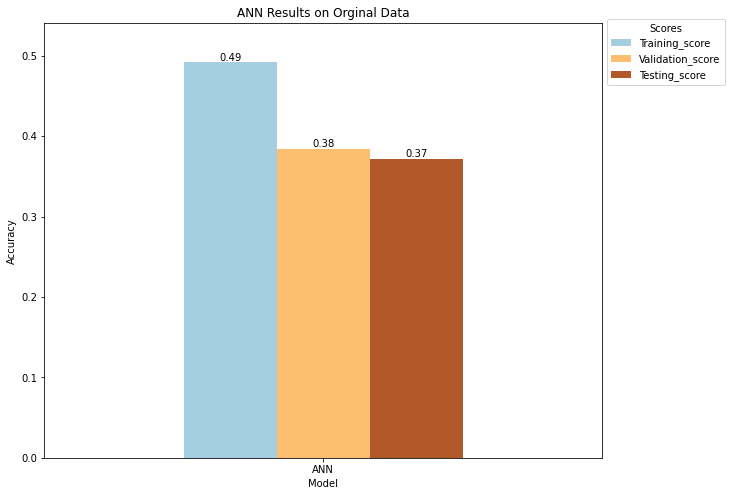

In [57]:
ax = ann.plot(kind='bar', rot=0, xlabel='Model', 
                          ylabel='Accuracy',
                          title='ANN Results on Orginal Data', figsize=(10, 8),
                          colormap = 'Paired')

for c in ax.containers:
    # set the bar label
    ax.bar_label(c, fmt='%.2f', label_type='edge')
    
# add a little space at the top of the plot for the annotation
ax.margins(y=0.1)

# move the legend out of the plot
ax.legend(title='Scores', bbox_to_anchor=(1, 1.02), loc='upper left')

plt.savefig("ANN_results_on_Orginal_data.jpeg", bbox_inches = "tight")

So it means neither any ML algorithm nor Neural Net are providing good accuracy.

So we will have to work to gain more data.

Since we do not have access to complete data, we will work to create synthetic data using GAN.

We will then compare, if our model's accuracy imporoves by providing additional data.